# 7. Statistics packages

## Distributions.jl

As the name would suggest, Distributions.jl provides functionality for various probability distributions.

In [1]:
using Distributions

In [2]:
d = Gamma(3,2)

Distributions.Gamma(α=3.0, θ=2.0)

In [3]:
mean(d), var(d)

(6.0,12.0)

In [4]:
pdf(d,0:0.1:3)

31-element Array{Float64,1}:
 0.0        
 0.000594518
 0.00226209 
 0.00484148 
 0.00818731 
 0.0121688  
 0.0166684  
 0.0215811  
 0.0268128  
 0.0322799  
 0.0379082  
 0.0436318  
 0.049393   
 ⋮          
 0.0872584  
 0.0919699  
 0.0964516  
 0.100694   
 0.104688   
 0.10843    
 0.111916   
 0.115145   
 0.118116   
 0.120833   
 0.123296   
 0.125511   

In [7]:
X = rand(d,100)

10x10 Array{Float64,2}:
 2.80079   4.07901   5.26255   7.38228  …   3.61091   5.66099   8.92313
 6.94863   5.28991   1.57632  10.6609       7.03281   2.30116   7.01324
 2.62051   9.11834  10.2317    5.24232      6.2849    3.49994   4.14605
 7.24121   8.81173   9.8089    4.4093       7.05899   4.27502   6.79942
 2.58273   9.85266   7.68609   9.03203      2.96286  10.4609    8.7031 
 3.54187  12.4285   10.1834    2.45463  …   6.83372   3.17248  12.3942 
 2.07135  10.4941    2.44646   5.3502       3.70042  10.5265   11.8478 
 8.03469   6.5471    3.97379   6.57143      5.96505   8.78241   1.75757
 5.56753   3.63735  19.0031    4.60105     11.6657    6.02682   4.92329
 5.94617   6.23812   5.99835   2.60393      5.93137   6.81997   9.09515

In [8]:
using Gadfly

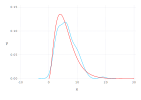

In [9]:
plot(
     layer(x -> pdf(d,x),0,30,Theme(default_color=colorant"red")),
     layer(x=X,Geom.density))

There is also some basic estimation functionality

In [10]:
df = fit_mle(Gamma,X)

Distributions.Gamma(α=3.8217770840773873, θ=1.6483241929931638)

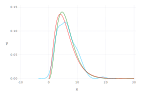

In [20]:
plot(
     layer(x -> pdf(d,x),0,30,Theme(default_color=colorant"red")),
     layer(x=X,Geom.density),
layer(x -> pdf(df,x),0,30,Theme(default_color=colorant"green"))
)

## DataFrames.jl

DataFrames provides the basic "data table" framework (similar to `data.frame` in R, or pandas in Python).

> **Note:** Though DataFrames is reasonably performant compared with R, it does have some notable performance limitations inherent in its design, and is likely to be redesigned or replaced in future.

In [12]:
using DataFrames

There is a `readtable` function for loading data from CSV or other delimited files. There are also various packages for importing from databases.

Can also construct directly:

In [13]:
DataFrame(col1=rand(10),col2=1:10)

,col1,col2
1,0.4071659401186132,1
2,0.837525051674529,2
3,0.6674439577418037,3
4,0.004583945910588083,4
5,0.401287279020226,5
6,0.3031459321117469,6
7,0.40069463923238713,7
8,0.5325509989262152,8
9,0.5614183045728565,9
10,0.5789870773625045,10


Each column is a `DataArray`, a type of `AbstractArray` that supports NA values. These can be created using the `@data` macro:

In [15]:
DataFrame(col1=@data([1,2,NA]),col2=[Normal(x,1) for x in 1:3])

,col1,col2
1,1,"Distributions.Normal(μ=1.0, σ=1.0)"
2,2,"Distributions.Normal(μ=2.0, σ=1.0)"
3,NA,"Distributions.Normal(μ=3.0, σ=1.0)"


In [ ]:
Pkg.add("RDatasets")

In [16]:
using RDatasets # datasets included with R
iris = dataset("datasets", "iris")

  likely near /Users/simon/.julia/v0.4/RDatasets/src/dataset.jl:1
  likely near /Users/simon/.julia/v0.4/RDatasets/src/dataset.jl:1
  likely near /Users/simon/.julia/v0.4/RDatasets/src/datasets.jl:1


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [21]:
iris[:SepalLength] # indexing by a symbol gives column

150-element DataArrays.DataArray{Float64,1}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4
 4.6
 5.0
 4.4
 4.9
 5.4
 4.8
 4.8
 ⋮  
 6.0
 6.9
 6.7
 6.9
 5.8
 6.8
 6.7
 6.7
 6.3
 6.5
 6.2
 5.9

In [24]:
iris[1,:] # usual row,column indexing

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa


In [25]:
iris[iris[:SepalLength] .< 5,:] # can subset by indexing

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,4.6,3.4,1.4,0.3,setosa
5,4.4,2.9,1.4,0.2,setosa
6,4.9,3.1,1.5,0.1,setosa
7,4.8,3.4,1.6,0.2,setosa
8,4.8,3.0,1.4,0.1,setosa
9,4.3,3.0,1.1,0.1,setosa
10,4.6,3.6,1.0,0.2,setosa


Supports the "split-apply-combine" strategy.

In [26]:
by(iris, :Species, df -> mean(df[:PetalLength]))

,Species,x1
1,setosa,1.462
2,versicolor,4.260000000000001
3,virginica,5.5520000000000005


Integrates nicely with Gadfly

In [17]:
using Gadfly

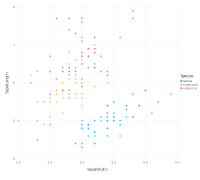

In [30]:
set_default_plot_size(20cm, 18cm)
plot(iris,x=:SepalWidth,y=:SepalLength,color=:Species)

## GLM.jl

Provides linear and generalized linear models

In [ ]:
Pkg.add("GLM")

In [31]:
using GLM

In [32]:
fit(LinearModel, SepalWidth ~ SepalLength + Species, iris)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.DensePredQR{Float64}},Float64}:

Coefficients:
                       Estimate Std.Error t value Pr(>|t|)
(Intercept)              1.6765   0.23536 7.12314   <1e-10
SepalLength             0.34988 0.0463013  7.5566   <1e-11
Species - versicolor  -0.983389 0.0720747 -13.644   <1e-27
Species - virginica    -1.00751 0.0933057 -10.798   <1e-19


In [33]:
warpbreaks = dataset("datasets","warpbreaks")

,Breaks,Wool,Tension
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L
6,52,A,L
7,51,A,L
8,26,A,L
9,67,A,L
10,18,A,M


In [35]:
g = fit(GeneralizedLinearModel,Breaks ~ Wool + Tension,warpbreaks,Poisson())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Poisson,GLM.LogLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
              Estimate Std.Error  z value Pr(>|z|)
(Intercept)    3.69196 0.0454107  81.3016   <1e-99
Wool - B     -0.205988 0.0515712 -3.99426    <1e-4
Tension - M   -0.32132 0.0602658 -5.33172    <1e-7
Tension - H  -0.518488 0.0639594 -8.10652   <1e-15


In [39]:
g

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Poisson,GLM.LogLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}:

Coefficients:
              Estimate Std.Error  z value Pr(>|z|)
(Intercept)    3.69196 0.0454107  81.3016   <1e-99
Wool - B     -0.205988 0.0515712 -3.99426    <1e-4
Tension - M   -0.32132 0.0602658 -5.33172    <1e-7
Tension - H  -0.518488 0.0639594 -8.10652   <1e-15


## Other 

* KernelDensity.jl: Kernel density estimators
* MixedModels.jl: fitting mixed effects models
* GLMNet.jl and Lasso.jl: Ridge, lasso, elastic net regression.

In [41]:
?whos

search: 

```
whos([io,] [Module,] [pattern::Regex])
```

Print information about exported global variables in a module, optionally restricted to those matching `pattern`.

The memory consumption estimate is an approximate lower bound on the size of the internal structure of the object.


whos with_bigfloat_precision with_rounding print_with_color



In [42]:
whos()

                    ArrayViews    191 KB     Module : ArrayViews
                          Base  37568 KB     Module : Base
                      Calculus    170 KB     Module : Calculus
                        Codecs     24 KB     Module : Codecs
                    ColorTypes    285 KB     Module : ColorTypes
                        Colors    718 KB     Module : Colors
                        Compat     76 KB     Module : Compat
                       Compose   2532 KB     Module : Compose
                       Contour     23 KB     Module : Contour
                          Core   7329 KB     Module : Core
                    DataArrays   1005 KB     Module : DataArrays
                    DataFrames   1840 KB     Module : DataFrames
                DataStructures    499 KB     Module : DataStructures
                     Distances    111 KB     Module : Distances
                 Distributions   1203 KB     Module : Distributions
                        Docile    408 KB     Module

In [43]:
whos(Distributions)

          AbstractMixtureModel    228 bytes  DataType : Distributions.AbstractM…


              AbstractMvNormal     92 bytes  DataType : Distributions.AbstractM…
                       Arcsine    124 bytes  DataType : Distributions.Arcsine
                     Bernoulli    112 bytes  DataType : Distributions.Bernoulli
                          Beta    124 bytes  DataType : Distributions.Beta
                     BetaPrime    124 bytes  DataType : Distributions.BetaPrime
                      Binomial    124 bytes  DataType : Distributions.Binomial
                      Biweight    124 bytes  DataType : Distributions.Biweight
                   Categorical    124 bytes  DataType : Distributions.Categoric…
                        Cauchy    124 bytes  DataType : Distributions.Cauchy
                           Chi    112 bytes  DataType : Distributions.Chi
                         Chisq    112 bytes  DataType : Distributions.Chisq
                    Continuous     92 bytes  DataType : Distributions.Continuous
        ContinuousDistribution     80 bytes  TypeConstruct

In [46]:
type Foo
    x::Int
    y::Float64
end

LoadError: LoadError: invalid redefinition of constant Foo
while loading In[46], in expression starting on line 1

LoadError: LoadError: UndefVarError: aic not defined
while loading In[47], in expression starting on line 1